In this script, the reconstruction error is calculated from multiple Isomap embeddings from k \includ [2, 200].
Visualizations are obtained from plotting the error over the neighbors, and by correlating the Isomap embeddings that result from different k-neighbors.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns

In [5]:
# File tags
tag = ["eucl_23_new_reconst"] # wasssqeu_23 / hausd_23
neig = [50] #  12 / 11 # neighbors tmp

# Max number of neighbors
ks = 200

# Fixed number of dimensions/components in the Isomap embedding
dim = 10

dir_base_local = f"/home/marlenesga/Documents/output/dim{dim}_k{neig[0]}_{tag[0]}"
diss_min_filename = f"{dir_base_local}/dissim_matrix_min_{tag[0]}.npy"
error_plots_filename = f"{dir_base_local}/finetuning_error_plts.png"

error_reconst_d = f"{dir_base_local}/error_reconst_d_all.png"

# Load dissimilarity matrix
with open(diss_min_filename, 'rb') as f:
    dissimilarity_matrix = np.load(f)

# Number of sulci count
N_sulcus = np.size(dissimilarity_matrix, 0)

# Fixed number of dimensions/components in the Isomap embedding
d = dim

# k neighbors list
kneighbors = np.linspace(2, ks, ks-1, dtype=int)

# Inits
recons_e_mdist_list = []
resid_var_list = []
isomap_matrix_mdist_dict = {}


for idx, k in enumerate(kneighbors):
    # in sulcus dissmililarity matrix mdist
    iso_mdist=manifold.Isomap(n_neighbors=k, n_components=d, metric='precomputed')
    isomap_matrix_mdist =iso_mdist.fit_transform(dissimilarity_matrix)
    isomap_matrix_mdist_dict[idx] = isomap_matrix_mdist

    recons_error_mdist = iso_mdist.reconstruction_error()
    recons_e_mdist_list.append(recons_error_mdist)

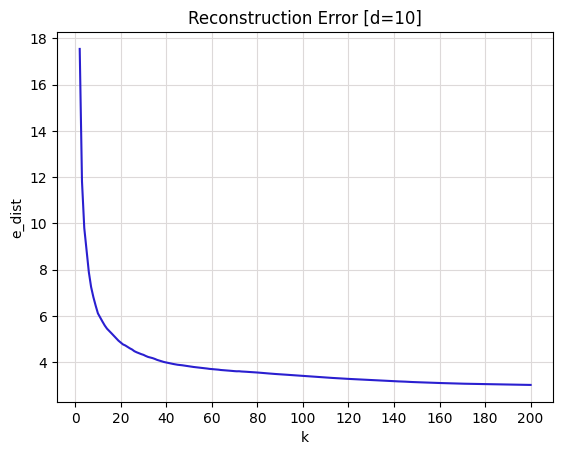

In [17]:
# PLOT RECONSTRUCTION ERROR OVER K-NEIGHBORS

idx = 0
col = ['#2a1fd0', '#1FD082', '#F6D04D'] # Colors
plt.plot(kneighbors, recons_e_mdist_list, color=col[idx], label="e_dist")
plt.xticks(np.linspace(0, ks, 11))
plt.grid(color='#ddd9d9')

plt.title('Reconstruction Error [d=10]')
plt.xlabel('k')
plt.ylabel('e_dist')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)  # Adjust wspace (width space) for horizontal spacing

#plt.savefig(error_reconst_d)
plt.show()

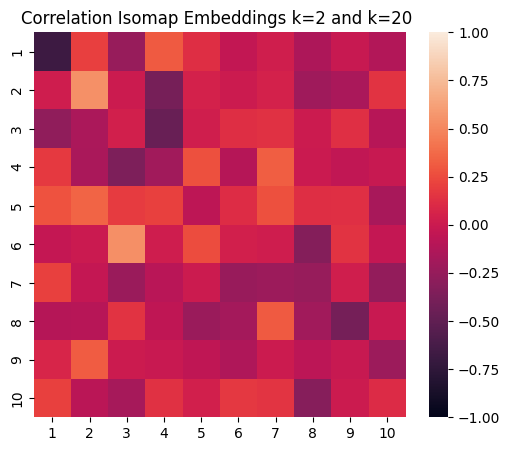

In [10]:
# CORRELATION BETWEEN DIFFERENT ISOMAP EMBEDDINGS RESULTED FROM DIFFERENT K-NEIGHBORS

k1 = 2 -2
k2 = 20 -2
matrix1 = isomap_matrix_mdist_dict[k1] # (324, 10)
matrix2 = isomap_matrix_mdist_dict[k2]

# Create a placeholder for the element-wise correlation matrix
element_wise_corr = np.zeros((10,10))

# Calculate element-wise correlation
for i in range(10):
    for j in range(10):
        element_wise_corr[i, j] = np.corrcoef(matrix1[:, i], matrix2[:, j])[0, 1]

# Convert to DataFrame for heatmap
element_wise_corr_df = pd.DataFrame(element_wise_corr)

# Plot the heatmap for element-wise correlation
plt.figure(figsize=(6, 5))
ax = sns.heatmap(element_wise_corr_df, vmin=-1, vmax=1)
plt.title(f"Correlation Isomap Embeddings k={k1 + 2} and k={k2 +2} ")

# Customize xticks and yticks
ax.set_xticklabels(range(1,11))  # Adjust the size of x-tick labels
ax.set_yticklabels(range(1,11))  # Adjust the size of y-tick labels

plt.show()